In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

from sklearn.metrics import mean_squared_error

In [4]:
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load the dataset
df = pd.read_csv("AMZN.csv", index_col=0, parse_dates=[0], date_parser=parser)

In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [6]:
df.shape

(5665, 6)

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5665.000000,5665.000000,5665.000000,5665.000000,5665.000000,5.665000e+03
mean,315.126044,318.499003,311.288491,315.053306,315.053306,7.602816e+06
std,488.289599,492.442904,483.041434,487.953106,487.953106,7.369511e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,37.150002,37.980000,36.500000,37.150002,37.150002,3.712600e+06
50%,80.110001,81.949997,78.010002,79.937500,79.937500,5.721800e+06
75%,320.989990,324.130005,316.750000,322.200012,322.200012,8.641200e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,1.043292e+08


In [8]:
# Taking only 'Close' column
amzn = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
amzn = amzn[amzn.index >= '2015-01-01']

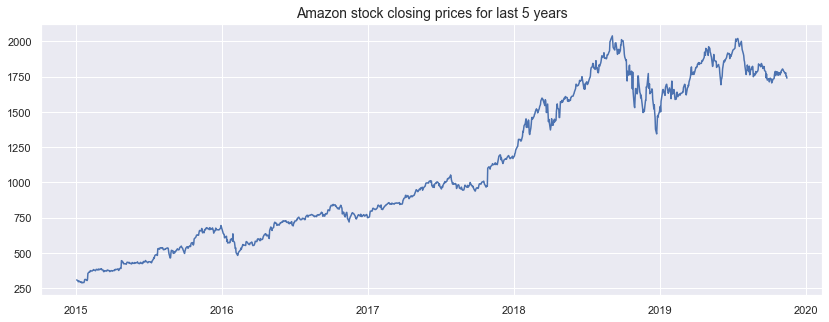

In [9]:
plt.figure(figsize=(14, 5))
plt.title('Amazon stock closing prices for last 5 years', fontsize=14)
plt.plot(amzn.Close)

In [10]:
Q1_2019_mean = amzn[(amzn.index >= '2019-01-01') & (amzn.index < '2019-03-31')].mean()
Q1_2019_var  = amzn[(amzn.index >= '2019-01-01') & (amzn.index < '2019-03-31')].var()
Q1_2017_mean = amzn[(amzn.index >= '2017-01-01') & (amzn.index < '2017-03-31')].mean()
Q1_2017_var  = amzn[(amzn.index >= '2017-01-01') & (amzn.index < '2017-03-31')].var()
Q4_2015_mean = amzn[(amzn.index >= '2015-10-01') & (amzn.index < '2015-12-31')].mean()
Q4_2015_var  = amzn[(amzn.index >= '2015-10-01') & (amzn.index < '2015-12-31')].var()

print('2019 Quarter 1 closing price mean     : %.2f ' % (Q1_2019_mean))
print('2019 Quarter 1 closing price variance : %.2f ' % (Q1_2019_var))
print("---------------------------------------------- ")
print('2017 Quarter 1 closing price mean     : %.2f ' % (Q1_2017_mean))
print('2017 Quarter 1 closing price variance : %.2f ' % (Q1_2017_var))
print("---------------------------------------------- ")
print('2015 Quarter 4 closing price mean     : %.2f ' % (Q4_2015_mean))
print('2015 Quarter 4 closing price variance : %.2f ' % (Q4_2015_var))

2019 Quarter 1 closing price mean     : 1664.34 
2019 Quarter 1 closing price variance : 3961.09 
---------------------------------------------- 
2017 Quarter 1 closing price mean     : 832.63 
2017 Quarter 1 closing price variance : 630.34 
---------------------------------------------- 
2015 Quarter 4 closing price mean     : 629.68 
2015 Quarter 4 closing price variance : 2663.21 


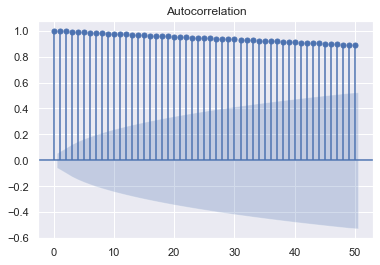

In [11]:
#plotting the auto correlation function
plot_acf(amzn, lags=50)
plt.show()

In [12]:
# Calculate the differnce of a element compared with a prevous row element
amzn_diff = amzn.diff(periods=1)
# Drop rows with NAN value. First row element will have NAN value because there is no previous element for calculating the differnce.
amzn_diff = amzn_diff.dropna()
# Display first five rows
amzn_diff.head()

,Close
Date,
2015-01-05,-6.329987
2015-01-06,-6.899993
2015-01-07,3.130004
2015-01-08,2.039978
2015-01-09,-3.529998


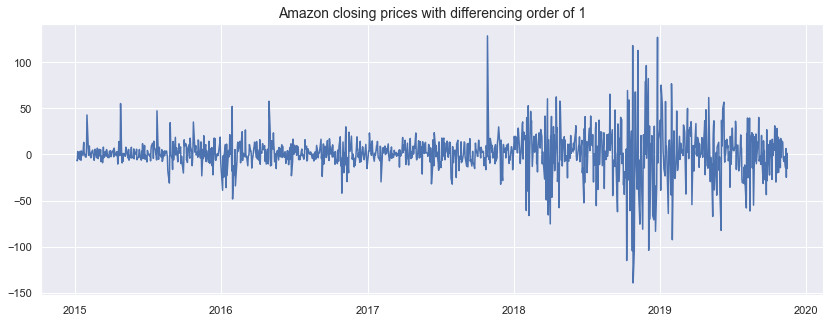

In [13]:
plt.figure(figsize=(14,5))
plt.title("Amazon closing prices with differencing order of 1",fontsize=14)
plt.plot(amzn_diff)

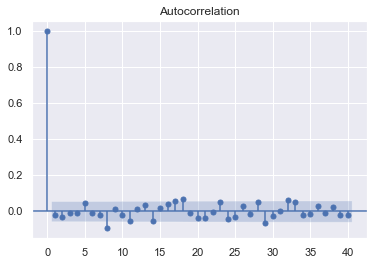

In [14]:
##Plot the auto correlation function
plot_acf(amzn_diff, lags=40)
plt.show()

In [15]:
##Autoregresssive model
X = amzn.values
size = int(len(X) * 0.70)  # 70 % 
# Training set
train = X[:size]
# testing set
test  = X[size:len(X)]

print("Total Samples    : %d" % len(X))
print("Training Samples : %d" % len(train))
print("Testing Samples  : %d" % len(test))

Total Samples    : 1228
Training Samples : 859
Testing Samples  : 369


In [16]:
#training the  autoregression model
ar_model = AR(train)
ar_model_fit = ar_model.fit()
print("Lags : %s" % ar_model_fit.k_ar)
print("Coefficients : %s" % ar_model_fit.params)

Lags : 21
Coefficients : [ 0.15011193  1.00034063 -0.01930613 -0.02891179  0.0065099   0.04891829
  0.02663261 -0.020074   -0.07619803  0.09928654 -0.0362198   0.00598414
 -0.02752875 -0.04766673  0.07538306 -0.00427602  0.03571702  0.01186344
 -0.04222053  0.02852493 -0.04093789  0.00594584]


AR MModel Mean Squared Error : 436643.25


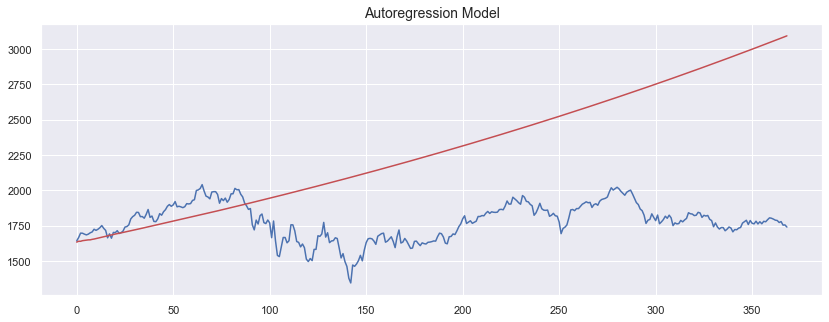

In [17]:
#making the predictions
preds = ar_model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

print("AR MModel Mean Squared Error : %.2f" % mean_squared_error(test, preds))
plt.figure(figsize=(14,5))
plt.title("Autoregression Model",fontsize=14)
plt.plot(test)
plt.plot(preds, color='r')

In [18]:
stock_history = [x for x in train ]
preds = []

# order=(p,d,q)
p = 5   # AR parameters/Lags
q = 1    # Differencing order
d = 0    # MA parameters

#arima_model = ARIMA(train, order=(5,1,0))
#arima_model_fit = arima_model.fit()

for i in range(len(test)):
    # initiate ARIMA model
    arima_model = ARIMA(stock_history, order=(p,q,d))
    # fit ARIMA mode;
    arima_model_fit = arima_model.fit()
    # forecast price
    output = arima_model_fit.forecast()[0]
    # append the test price to a stock history data
    stock_history.append(test[i])  
    # append the forcasted price to a list
    preds.append(output)

Mean Squared Error : 1137.65


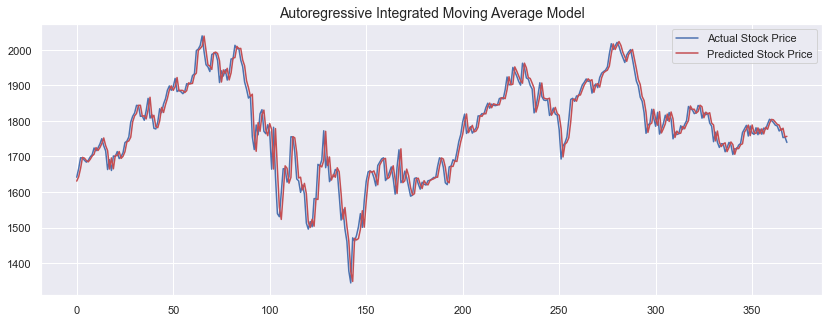

In [19]:
print("Mean Squared Error : %.2f" % mean_squared_error(test, preds))
plt.figure(figsize=(14,5))
plt.title("Autoregressive Integrated Moving Average Model",fontsize=14)
plt.plot(test, label='Actual Stock Price')
plt.plot(preds, color='r', label='Predicted Stock Price')
plt.legend()

In [20]:
#forecasting stock price for next 300 days
train_test = np.concatenate((train, test))
stock_history = [x for x in train_test]
preds = []
forecasting_days = 300

for i in range(forecasting_days):
    # initiate ARIMA model
    arima_model = ARIMA(stock_history, order=(p,q,d))
    # fit ARIMA mode;
    arima_model_fit = arima_model.fit()
    # forecast price
    output = arima_model_fit.forecast()[0]
    # append the forecasted price to a stock history data
    stock_history.append(output)  
    # append the forcasted price to a prediction list
    preds.append(output)

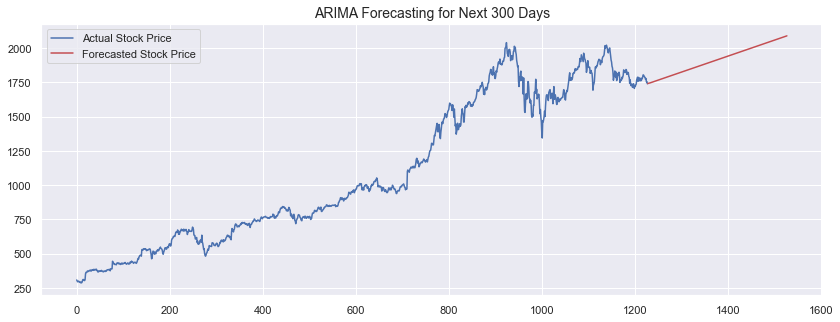

In [21]:
start = len(train_test)
end = len(train_test) + int(forecasting_days)
history = pd.Series(stock_history)

plt.figure(figsize=(14,5))
plt.title("ARIMA Forecasting for Next 300 Days",fontsize=14)
plt.plot(history[0:start], label='Actual Stock Price')
plt.plot(history[start:end], color='r', label='Forecasted Stock Price')
plt.legend()

In [22]:
import math
def parser(x):
    return datetime.strptime(x, '%Y-%m-%d')

# Load the dataset
df1 = pd.read_csv("AMZN.csv", index_col=0, parse_dates=[0], date_parser=parser)
data = df1.filter(['Close'])
#Converting the dataframe to a numpy array
dataset = data.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

4532

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[2.75990426e-04],
       [1.63550209e-04],
       [1.53328014e-04],
       ...,
       [8.59477929e-01],
       [8.60208993e-01],
       [8.52795283e-01]])

In [24]:
#Creating the scaled training data set
train_data = scaled_data[0:training_data_len  , : ]
#Spliting the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([2.75990426e-04, 1.63550209e-04, 1.53328014e-04, 1.17551805e-04,
       1.53328014e-05, 0.00000000e+00, 5.11095017e-05, 9.19968087e-05,
       6.64423031e-05, 5.36648051e-05, 5.11095017e-05, 5.62205991e-05,
       4.08877976e-05, 1.02221947e-05, 7.15534005e-05, 1.27773509e-04,
       1.43106310e-04, 9.19968087e-05, 7.15534005e-05, 1.02219003e-04,
       9.19968087e-05, 8.68862020e-05, 5.36648051e-05, 5.62205991e-05,
       5.62205991e-05, 6.38869998e-05, 5.11095017e-05, 5.62205991e-05,
       5.62205991e-05, 5.62205991e-05, 4.59984043e-05, 7.15534005e-05,
       5.87759024e-05, 9.45526027e-05, 2.52991224e-04, 2.96434325e-04,
       4.44651242e-04, 4.54873437e-04, 5.72424751e-04, 4.39540635e-04,
       3.62876628e-04, 5.11093545e-04, 4.59984043e-04, 4.03763935e-04,
       3.73098332e-04, 3.85875830e-04, 3.62876628e-04, 4.39540635e-04,
       4.24207834e-04, 4.08875032e-04, 4.54873437e-04, 5.31537444e-04,
       5.16204642e-04, 4.90649646e-04, 5.00871841e-04, 4.49762339e-04,
     

In [25]:
#Here we are Converting x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [26]:
# Here we are reshaping the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [27]:
#now we are Building the LSTM network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [28]:
# here we are Compiling the model
import keras
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
# here we are training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

4472/4472 [==============================] - 112s 24ms/step - loss: 4.9808e-05


In [30]:
# here we are testing data set
test_data = scaled_data[training_data_len - 60: , : ]
#Creating the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [31]:
# here we are converting x_test to a numpy array  
x_test = np.array(x_test)

In [32]:
# here we are reshaping the data into the shape accepted by the LSTM  
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [33]:
# now we are getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [34]:
# here we are calculaing the value of RMSE 
print(np.sqrt(((predictions - y_test)**2).mean()))

105.31392922561243


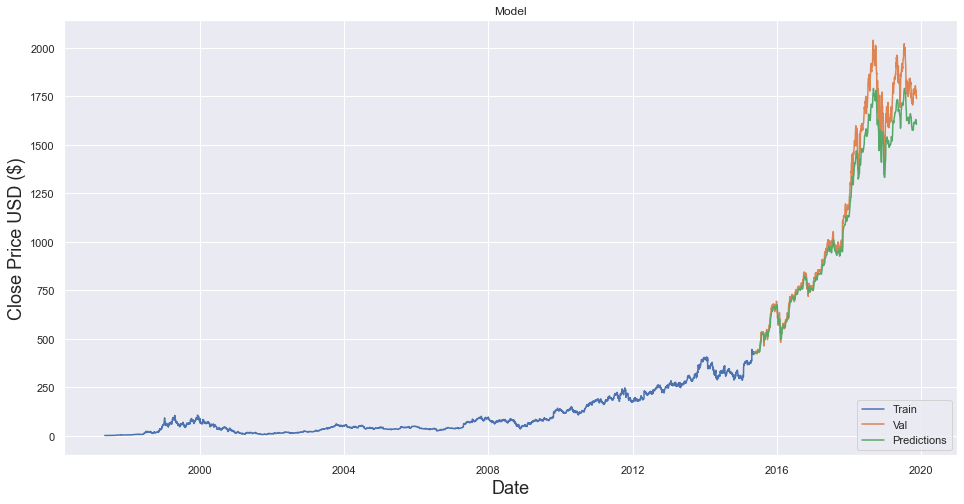

In [35]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [36]:
print(valid)

                  Close  Predictions
Date                                
2015-05-20   423.859985   425.213226
2015-05-21   431.630005   424.094055
2015-05-22   427.630005   424.973541
2015-05-26   425.470001   425.700500
2015-05-27   431.420013   425.844269
...                 ...          ...
2019-11-11  1771.650024  1627.958740
2019-11-12  1778.000000  1622.880249
2019-11-13  1753.109985  1619.252686
2019-11-14  1754.599976  1611.947388
2019-11-15  1739.489990  1605.678101

[1133 rows x 2 columns]
